[final_selection_and_visualization.ipynb] instruction


This is our final step code. The input files needed for running this file are [covered_floors.csv] and [uncovered_floors.csv] in [new_data] folder.


In this [final_selection_and_visualization.ipynb], we make final selection for installing new water bottle station.We also make visualizations for covered floors sheet, uncovered floors sheet and select candidates sheet. Answers to key questions are based on this code.

Here are all the steps we done for this code file :

1. We plot a figure which shows average mean and max density for covered and uncovered floors, name it as [mean and max density.png]

2. We plot a figure which shows average mean and max density for covered and uncovered floors with Mechanical Ventilation status shown ,we name it as [mechanical ventilation influence.png]

3. We build a weight score standard based on [mean density ,max density, Mechanical Ventilation , high volume] , select top 50 weight score floors from [uncovered_floors.csv]  ,and then define them as new candidates. The formed new candidates are called [selected_candidates.csv], here is detail of weight score:

    Weight for selecting new water bottle station = ( mean density × 1 + max density × 0.3 ) × volume factor × ventilation factor

    Volume factor is: 10 if high volume, else 1 

    Ventilation factor is: 1 if Mechanical Ventilation is 'Yes', 2 if Mechanical Ventilation is 'Partial', 3 if Mechanical Ventilation is 'No'


4. We plot two figures called [Top_15_covered_floors_based_on_Mean_density.png] and [Top_15_covered_floors_based_on_Mean_density_with_Max_density_also_shown.png], which are  the bar chart to display top15 mean density covered floors and the bar chart to display top15 mean density covered floor with max density also shown.

5. We plot three figures called [Top_15_selected_candidates_based_on_Mean_density.png] and [Top_15_selected_candidates_based_on_Mean_density_with_Max_density_also_shown.png] and [Top_15_Selected_Candidates_Based_on_Mean_Density_with_Weights_also_Shown.png], which are the bar chart to display top15 selected new stations based on mean density, the bar chart to display top15 selected new stations based on mean density with max density also shown, and the bar chart to display top15 selected new stations based on mean density with weights also shown.


6. We plot three figures called [Top_15_selected_candidates_based_on_Weight.png] and [Top_15_Selected_Candidates_Based_on_Weight_with_Max_Density_Also_Shown.png] and [Top_15_Selected_Candidates_Based_on_Weight_with_Mean_Density_Also_Shown.png] which are the bar chart to display top15 selected new stations based on weight, the bar chart to display top15 selected new stations based on weight with max density also shown, and the bar chart to display top15 selected new stations based on wieght with mean density also shown.

7. We make a google map for showing the location of top 15 new water stations highlighted by weights as priority,  this google map is saved as [top_15_candidates_map_by_weight.html].  When we click on these new station points, details of that point will show, including building address, building floor, weight score, building type and ranking.

8. We make two pie charts for showing distribution of building types and Mechanical Ventilation for selected candidates, called [Distribution_of_Building_Types_for_selected_candidates.png] and [Distribution_of_Mechanical_Ventilation_for_selected_candidates.png]

All the images and [top_15_candidates_map_by_weight.html] are saved in [visualization] folder. [selected_candidates.csv] is saved in [new_data] folder.


average mean density for covered floor is  14.839931621231333
average max density for covered floor is  115.29354838709678
average mean density for uncovered floor is  7.873330717553818
average max density for uncovered floor is  71.61261261261261


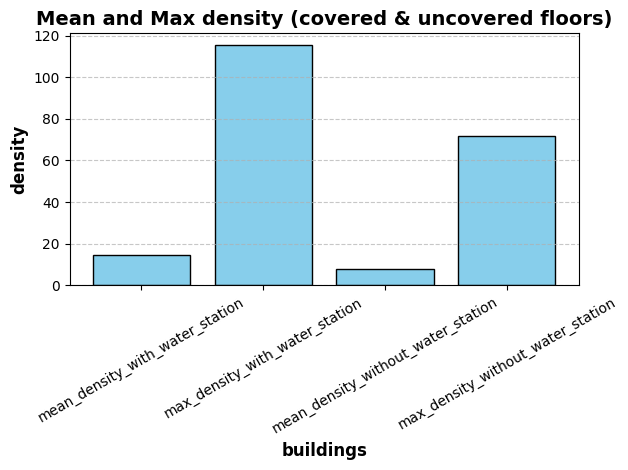

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# read data
data_covered = pd.read_csv('../new_data/covered_floors.csv')
data_minus_covered = pd.read_csv('../new_data/uncovered_floors.csv')

# calculate average density cnt mean and max for covered floor
covered_mean_density_avg = data_covered['mean_density_cnt'].mean()
covered_max_density_avg = data_covered['max_density_cnt'].mean()
# calculate density cnt mean and max for uncovered floor
minus_covered_mean_density_avg = data_minus_covered['mean_density_cnt'].mean()
minus_covered_max_density_avg = data_minus_covered['max_density_cnt'].mean()

# show result
print("average mean density for covered floor is ", covered_mean_density_avg)
print("average max density for covered floor is ", covered_max_density_avg)
print("average mean density for uncovered floor is ", minus_covered_mean_density_avg)
print("average max density for uncovered floor is ", minus_covered_max_density_avg)


density_cnt_summary = (covered_mean_density_avg, covered_max_density_avg, minus_covered_mean_density_avg, minus_covered_max_density_avg)
buildings = [
    "mean_density_with_water_station", 
    "max_density_with_water_station",
    "mean_density_without_water_station",
    "max_density_without_water_station"
]
#plt.figure(figsize=(8,6))

plt.bar(buildings, density_cnt_summary, color='skyblue', edgecolor='black')

plt.xlabel('buildings', fontsize=12, fontweight='bold')
plt.ylabel('density', fontsize=12, fontweight='bold')
plt.title('Mean and Max density (covered & uncovered floors)', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()
plt.savefig('../visualization/mean and max density.png')


from code above we can find that mean and max density for covered floor are much larger than 
mean and max density for covered floor for uncover floor. so we will take mean and max
density into account.

now we calculate the average mean and max density for mehanical ventilation or not.

average mean density for covered floor when Mechanical Ventilation is No is  5.5039546453662656
average max density for covered floor when Mechanical Ventilation is No is  44.16279069767442
average mean density for covered floor when Mechanical Ventilation is Partial is  17.297525739592665
average max density for covered floor when Mechanical Ventilation is Partial is  131.25
average mean density for covered floor when Mechanical Ventilation is Yes is  16.189333937699885
average max density for covered floor when Mechanical Ventilation is Yes is  126.06410256410257
average mean density for uncovered floor when Mechanical Ventilation is No is  3.467553990187924
average max density for uncovered floor when Mechanical Ventilation is No is  26.94736842105263
average mean density for uncovered floor when Mechanical Ventilation is Partial is  7.863432397393315
average max density for uncovered floor when Mechanical Ventilation is Partial is  51.75
average mean density for uncovered floor whe

/var/folders/ns/hr1_p53139d6p0c3qh7kfwz40000gn/T/ipykernel_28154/1663020970.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(buildings, rotation=45)


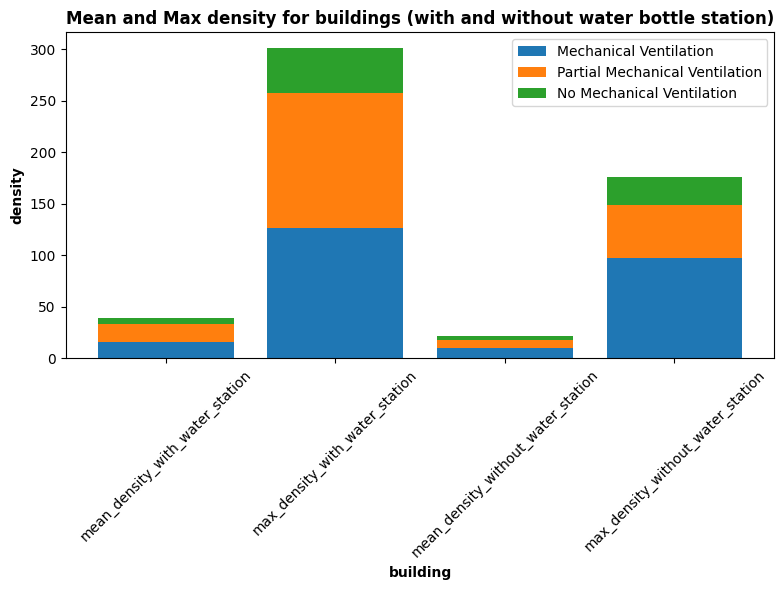

In [10]:
# Re-filter data by Mechanical Ventilation status with correct column name and calculate averages for each category
# For locations with water bottle stations
covered_no = data_covered[data_covered['Mechanical Ventilation'] == 'No']
covered_partial = data_covered[data_covered['Mechanical Ventilation'] == 'Partial']
covered_yes = data_covered[data_covered['Mechanical Ventilation'] == 'Yes']

covered_averages_corrected = {
    'No': {
        'mean_density_cnt': covered_no['mean_density_cnt'].mean(),
        'max_density_cnt': covered_no['max_density_cnt'].mean()
    },
    'Partial': {
        'mean_density_cnt': covered_partial['mean_density_cnt'].mean(),
        'max_density_cnt': covered_partial['max_density_cnt'].mean()
    },
    'Yes': {
        'mean_density_cnt': covered_yes['mean_density_cnt'].mean(),
        'max_density_cnt': covered_yes['max_density_cnt'].mean()
    }
}

# For locations without water bottle stations
minus_covered_no = data_minus_covered[data_minus_covered['Mechanical Ventilation'] == 'No']
minus_covered_partial = data_minus_covered[data_minus_covered['Mechanical Ventilation'] == 'Partial']
minus_covered_yes = data_minus_covered[data_minus_covered['Mechanical Ventilation'] == 'Yes']

minus_covered_averages_corrected = {
    'No': {
        'mean_density_cnt': minus_covered_no['mean_density_cnt'].mean(),
        'max_density_cnt': minus_covered_no['max_density_cnt'].mean()
    },
    'Partial': {
        'mean_density_cnt': minus_covered_partial['mean_density_cnt'].mean(),
        'max_density_cnt': minus_covered_partial['max_density_cnt'].mean()
    },
    'Yes': {
        'mean_density_cnt': minus_covered_yes['mean_density_cnt'].mean(),
        'max_density_cnt': minus_covered_yes['max_density_cnt'].mean()
    }
}

print("average mean density for covered floor when Mechanical Ventilation is No is ", covered_no['mean_density_cnt'].mean())
print("average max density for covered floor when Mechanical Ventilation is No is ", covered_no['max_density_cnt'].mean())
print("average mean density for covered floor when Mechanical Ventilation is Partial is ", covered_partial['mean_density_cnt'].mean())
print("average max density for covered floor when Mechanical Ventilation is Partial is ", covered_partial['max_density_cnt'].mean())
print("average mean density for covered floor when Mechanical Ventilation is Yes is ", covered_yes['mean_density_cnt'].mean())
print("average max density for covered floor when Mechanical Ventilation is Yes is ", covered_yes['max_density_cnt'].mean())
print("average mean density for uncovered floor when Mechanical Ventilation is No is ", minus_covered_no['mean_density_cnt'].mean())
print("average max density for uncovered floor when Mechanical Ventilation is No is ", minus_covered_no['max_density_cnt'].mean())
print("average mean density for uncovered floor when Mechanical Ventilation is Partial is ", minus_covered_partial['mean_density_cnt'].mean())
print("average max density for uncovered floor when Mechanical Ventilation is Partial is ", minus_covered_partial['max_density_cnt'].mean())
print("average mean density for uncovered floor when Mechanical Ventilation is Yes is ", minus_covered_yes['mean_density_cnt'].mean())
print("average max density for uncovered floor when Mechanical Ventilation is Yes is ", minus_covered_yes['max_density_cnt'].mean())
#covered_averages_corrected, minus_covered_averages_corrected
buildings = [
    "mean_density_with_water_station", 
    "max_density_with_water_station",
    "mean_density_without_water_station",
    "max_density_without_water_station"
]

values1 = [
    covered_yes['mean_density_cnt'].mean(),
    covered_yes['max_density_cnt'].mean(),
    minus_covered_yes['mean_density_cnt'].mean(),
    minus_covered_yes['max_density_cnt'].mean()

]

values2 = [
    covered_partial['mean_density_cnt'].mean(),
    covered_partial['max_density_cnt'].mean(),
    minus_covered_partial['mean_density_cnt'].mean(),
    minus_covered_partial['max_density_cnt'].mean()
]

values3 = [
    covered_no['mean_density_cnt'].mean(),
    covered_no['max_density_cnt'].mean(),
    minus_covered_no['mean_density_cnt'].mean(),
    minus_covered_no['max_density_cnt'].mean()
]

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(buildings, values1, label='Mechanical Ventilation')
bar2 = ax.bar(buildings, values2, bottom=values1, label='Partial Mechanical Ventilation')
bar3 = ax.bar(buildings, values3, bottom=[values1[i] + values2[i] for i in range(len(values1))], label='No Mechanical Ventilation')

ax.set_xlabel('building', fontweight='bold')
ax.set_ylabel('density', fontweight='bold')
ax.set_title('Mean and Max density for buildings (with and without water bottle station)', fontweight='bold')
ax.legend()
ax.set_xticklabels(buildings, rotation=45)

plt.tight_layout()
#plt.show()
plt.savefig('../visualization/mechanical ventilation influence.png')


In our analysis of the impact of mechanical ventilation, we noted a significant increase in both average and maximum densities at locations fully equipped with mechanical ventilation systems. Therefore, we focused on these locations to determine the necessity of adding new water bottle stations. 

then we select the candidates for water bottle staions as the top 50 buildings/floors by a linear combination of mean density, max density, and ventilation.

In [11]:
import pandas as pd

# read data
data_covered = pd.read_csv('../new_data/covered_floors.csv')
data_minus_covered = pd.read_csv('../new_data/uncovered_floors.csv')

# add weights
#change high volumn weight to 10 instead of inf to be convenient for graphing
mean_density_weight = 1
max_density_weight = 0.3
ventilation_mult = lambda x: 1 if x == "Yes" else (2 if x == "Partial" else 3)
#high_volumn_mult = lambda x: float("inf") if x else 1
high_volumn_mult = lambda x: 10 if x else 1

data_minus_covered["weight"] = data_minus_covered["high_volumn"].map(high_volumn_mult) * data_minus_covered["Mechanical Ventilation"].map(ventilation_mult) * (mean_density_weight * data_minus_covered["mean_density_cnt"] + max_density_weight * data_minus_covered["max_density_cnt"])

data_minus_covered = data_minus_covered[data_minus_covered['Candidacy'] != "Already completed/sufficient"]

# select candidates as top 50
candidates = data_minus_covered.sort_values('weight', ascending=False).head(50)

# Reorder columns to make 'weight' the first column
cols = ['weight'] + [col for col in candidates.columns if col != 'weight']
candidates = candidates[cols]

# print result

candidates.drop(columns=['high_volumn']).to_csv('../new_data/selected_candidates.csv', index=False)  # Saving to a CSV file without the index
#candidates.to_csv('selected_candidates.csv', index=False)
candidates


,weight,building_floor,building_desc,latitude,longitude,building_type,capacity,mean_density_cnt,max_density_cnt,average_dc_ratio,max_dc_ratio,Residential Building Type,Mechanical Ventilation,Room Name,Candidacy,High Volume,high_volumn
54,1703.998059,3,285 BABCOCK STREET,42.3540,-71.1203,Athletic,1138,9.599806,536,0.008436,0.471002,NaN,Yes,Case Center Eilberg Lounge,NaN,Yes,True
1,1614.545178,c,925 COMMONWEALTH AVENUE,42.3522,-71.1177,Athletic,0,48.954518,375,inf,inf,NaN,Yes,Agganis Arena Friends of Hockey Lounge,Maybe,Yes,True
3,598.211856,3,925 COMMONWEALTH AVENUE,42.3522,-71.1177,Athletic,29,41.111856,1857,1.417650,64.034483,NaN,Yes,NaN,NaN,NaN,False
29,493.601438,3,775 COMMONWEALTH AVENUE,42.3509,-71.1090,Student Support,144,14.260144,117,0.099029,0.812500,NaN,Yes,George Sherman Union Conference Rooms,Good candidate for bottle fillers,Yes,True
0,324.348047,-1,700 COMMONWEALTH AVENUE,42.3493,-71.1040,Residential,0,53.274023,363,inf,inf,Large Dormitory-Style,Partial,NaN,NaN,NaN,False
9,262.952264,2,100 ASHFORD STREET,42.3546,-71.1236,Athletic,48,23.852264,797,0.496922,16.604167,NaN,Yes,NaN,NaN,NaN,False
7,255.134273,1,700 COMMONWEALTH AVENUE,42.3493,-71.1040,Residential,171,33.367137,314,0.195129,1.836257,Large Dormitory-Style,Partial,NaN,NaN,NaN,False
2,174.848874,1,949 COMMONWEALTH AVENUE,42.3519,-71.1187,Academic,45,45.248874,432,1.005531,9.600000,NaN,Yes,NaN,NaN,NaN,False
104,161.306383,4,617-621 COMMONWEALTH AVENUE,42.3497,-71.1013,Academic,30,6.068794,159,0.202293,5.300000,NaN,No,NaN,NaN,NaN,False
4,159.697705,2,8 ST. MARY'S STREET,42.3492,-71.1061,Research,145,39.097705,402,0.269639,2.772414,NaN,Yes,NaN,NaN,NaN,False


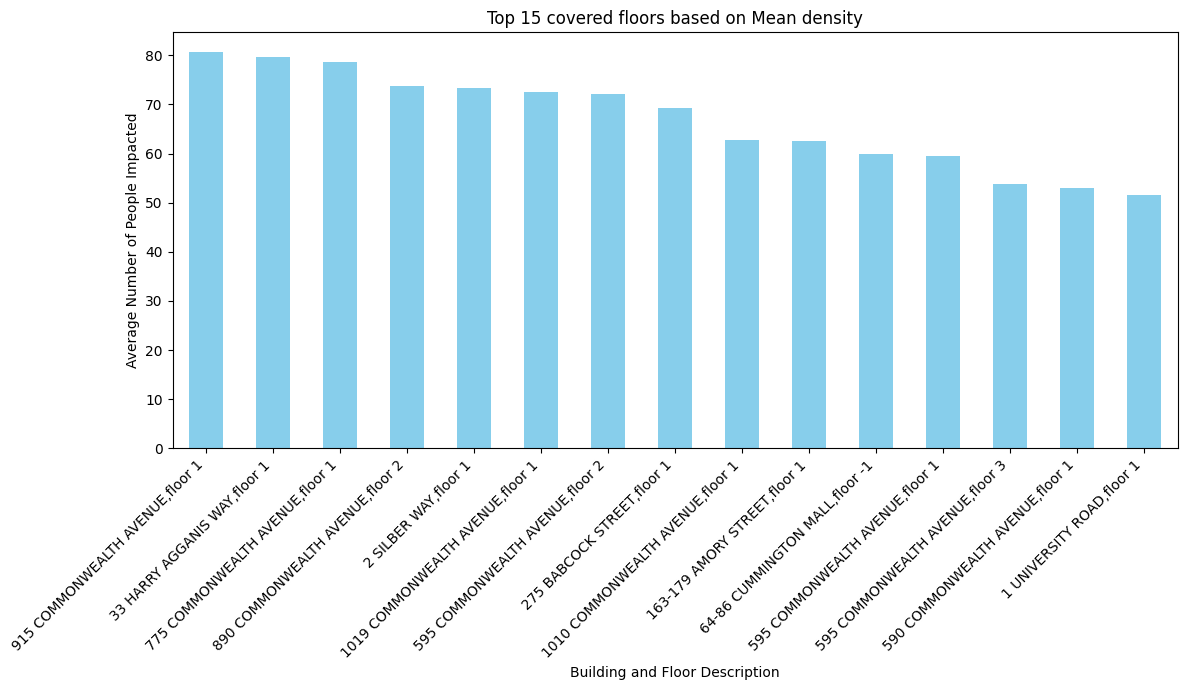

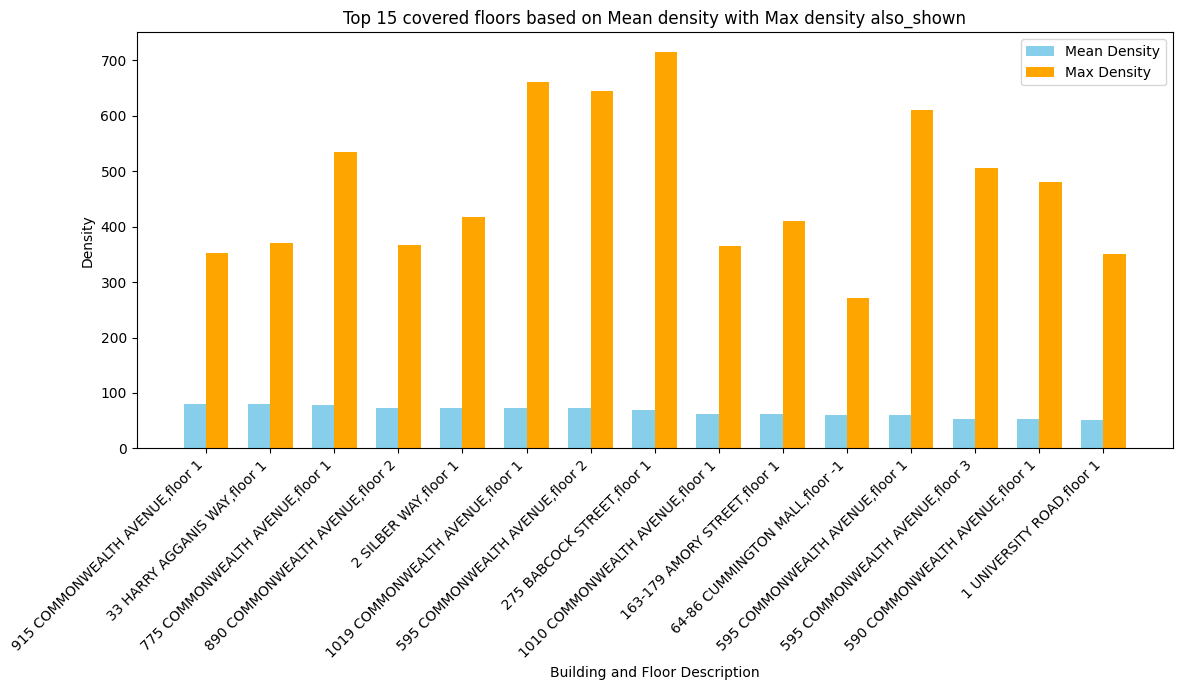

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
plot_data = pd.read_csv('../new_data/covered_floors.csv')

# Create a new column combining building description and floor
plot_data['description_floor'] = plot_data['building_desc'] + ",floor " + plot_data['building_floor'].astype(str)

# Now you can proceed with the sorting and plotting as you described
top_15_mean_density = plot_data.sort_values(by='mean_density_cnt', ascending=False).head(15)

# Plotting the top 15 buildings based on average density
plt.figure(figsize=(12, 7))
top_15_mean_density.set_index('description_floor')['mean_density_cnt'].plot(kind='bar', color='skyblue')

plt.title('Top 15 covered floors based on Mean density')
plt.xlabel('Building and Floor Description')
plt.ylabel('Average Number of People Impacted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../visualization/Top_15_covered_floors_based_on_Mean_density.png')
#also show max density now

# First axis for mean density
# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Set the positions of the bars on the x-axis
indices = range(len(top_15_mean_density))
width = 0.35  # the width of the bars

# Plot mean density
mean_bars = ax.bar(indices, top_15_mean_density['mean_density_cnt'], width, label='Mean Density', color='skyblue')

# Plot max density
max_bars = ax.bar([i + width for i in indices], top_15_mean_density['max_density_cnt'], width, label='Max Density', color='orange')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Building and Floor Description')
ax.set_ylabel('Density')
ax.set_title('Top 15 covered floors based on Mean density with Max density also_shown')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(top_15_mean_density['description_floor'], rotation=45, ha='right')

# Adding a legend to distinguish between mean and max densities
ax.legend()

fig.tight_layout()  # to make sure layout is handled well
plt.savefig('../visualization/Top_15_covered_floors_based_on_Mean_density_with_Max_density_also_shown.png')
plt.show()



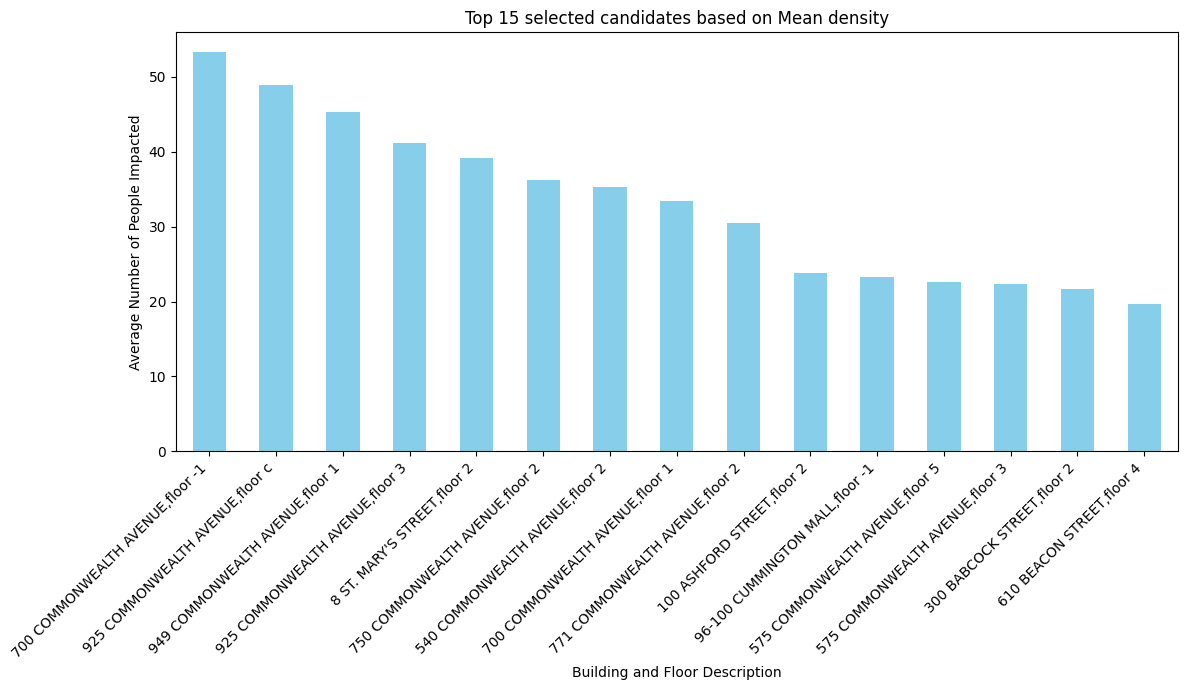

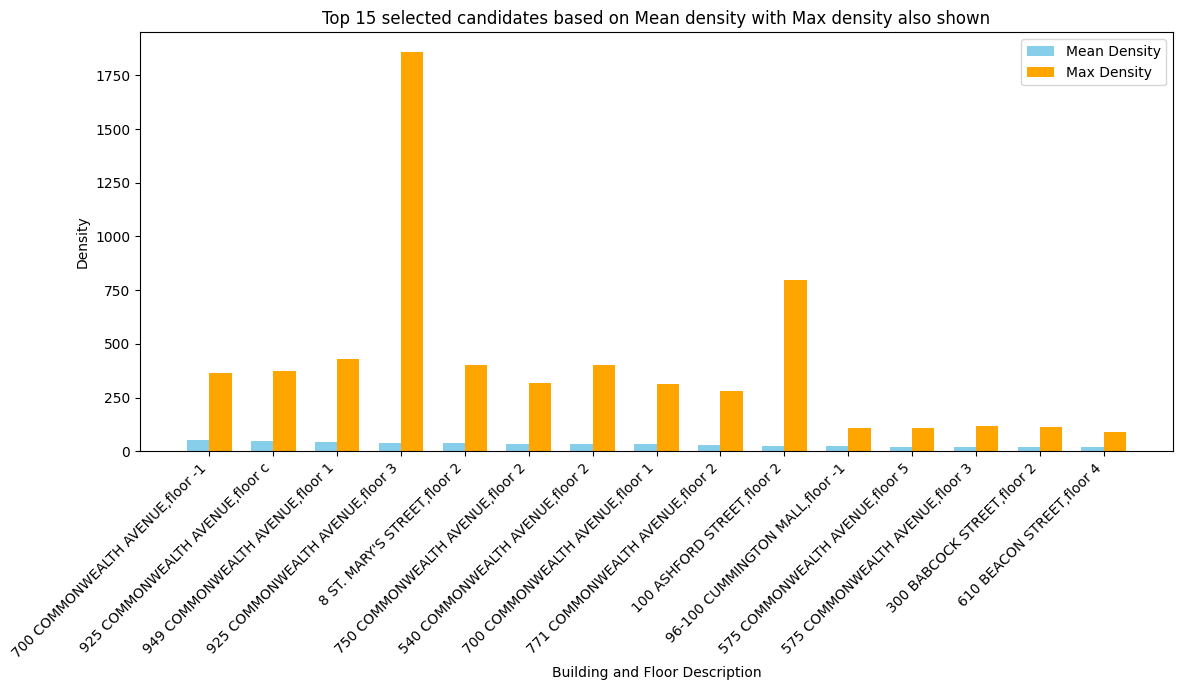

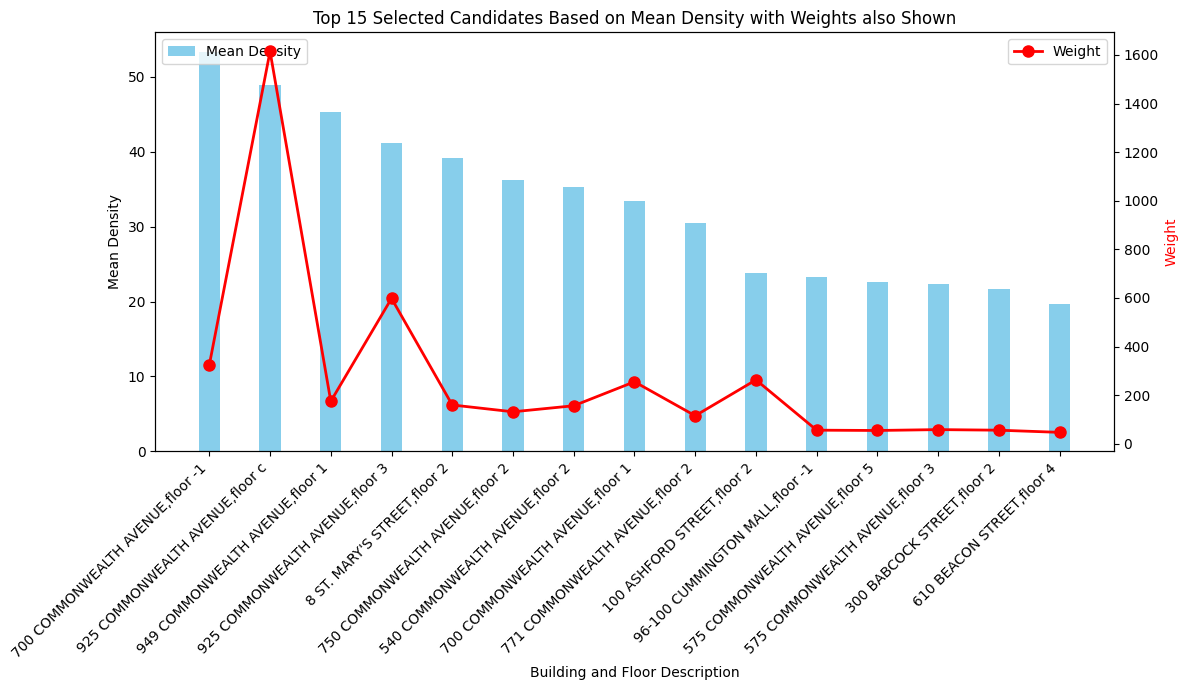

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading the data
plot_data = pd.read_csv('../new_data/selected_candidates.csv')


# Create a new column combining building description and floor
plot_data['description_floor'] = plot_data['building_desc'] + ",floor " + plot_data['building_floor'].astype(str)

# Now you can proceed with the sorting and plotting as you described
top_15_mean_density = plot_data.sort_values(by='mean_density_cnt', ascending=False).head(15)

# Plotting the top 15 buildings based on average density
plt.figure(figsize=(12, 7))
top_15_mean_density.set_index('description_floor')['mean_density_cnt'].plot(kind='bar', color='skyblue')

plt.title('Top 15 selected candidates based on Mean density')
plt.xlabel('Building and Floor Description')
plt.ylabel('Average Number of People Impacted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../visualization/Top_15_selected_candidates_based_on_Mean_density.png')
#also show max density now

# First axis for mean density
# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Set the positions of the bars on the x-axis
indices = range(len(top_15_mean_density))
width = 0.35  # the width of the bars

# Plot mean density
mean_bars = ax.bar(indices, top_15_mean_density['mean_density_cnt'], width, label='Mean Density', color='skyblue')

# Plot max density
max_bars = ax.bar([i + width for i in indices], top_15_mean_density['max_density_cnt'], width, label='Max Density', color='orange')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Building and Floor Description')
ax.set_ylabel('Density')
ax.set_title('Top 15 selected candidates based on Mean density with Max density also shown')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(top_15_mean_density['description_floor'], rotation=45, ha='right')

# Adding a legend to distinguish between mean and max densities
ax.legend()

fig.tight_layout()  # to make sure layout is handled well
plt.savefig('../visualization/Top_15_selected_candidates_based_on_Mean_density_with_Max_density_also_shown.png')
plt.show()

#draw also include weight
# Plotting the top 15 buildings based on average density and also shown weight
fig, ax = plt.subplots(figsize=(12, 7))

# Set the positions of the bars on the x-axis
indices = range(len(top_15_mean_density))
width = 0.35  # the width of the bars

# Plot mean density
mean_bars = ax.bar(indices, top_15_mean_density['mean_density_cnt'], width, label='Mean Density', color='skyblue')

# Plot weight as a line
ax2 = ax.twinx()  # Create a second y-axis for the weights
ax2.plot(indices, top_15_mean_density['weight'], label='Weight', color='red', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Building and Floor Description')
ax.set_ylabel('Mean Density')
ax2.set_ylabel('Weight', color='red')
ax.set_title('Top 15 Selected Candidates Based on Mean Density with Weights also Shown')
ax.set_xticks(indices)
ax.set_xticklabels(top_15_mean_density['description_floor'], rotation=45, ha='right')

# Adding a legend to distinguish between mean density and weight
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # to make sure layout is handled well
plt.savefig('../visualization/Top_15_Selected_Candidates_Based_on_Mean_Density_with_Weights_also_Shown.png')
plt.show()


#now also show mean density now



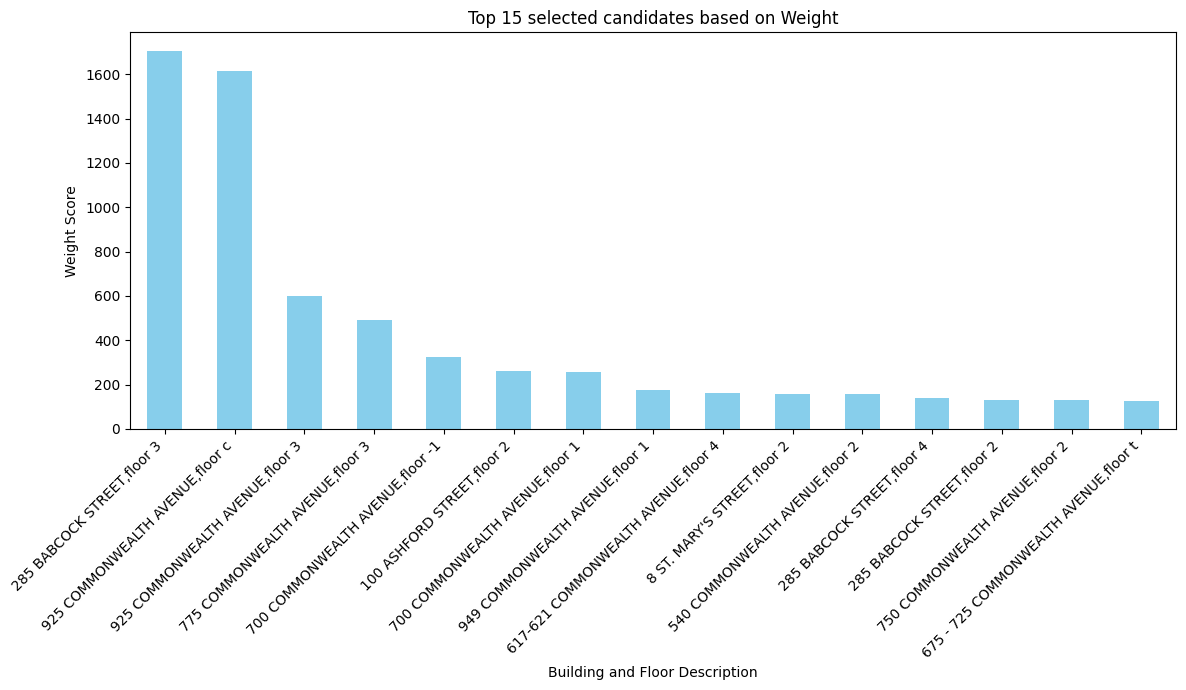

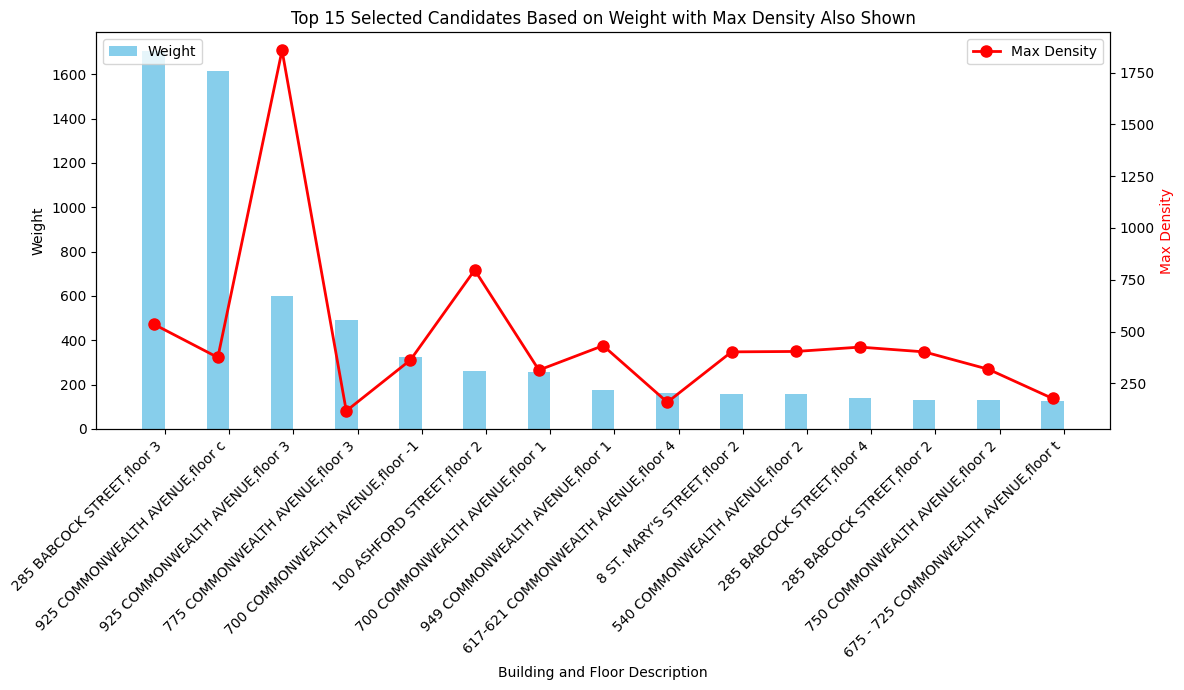

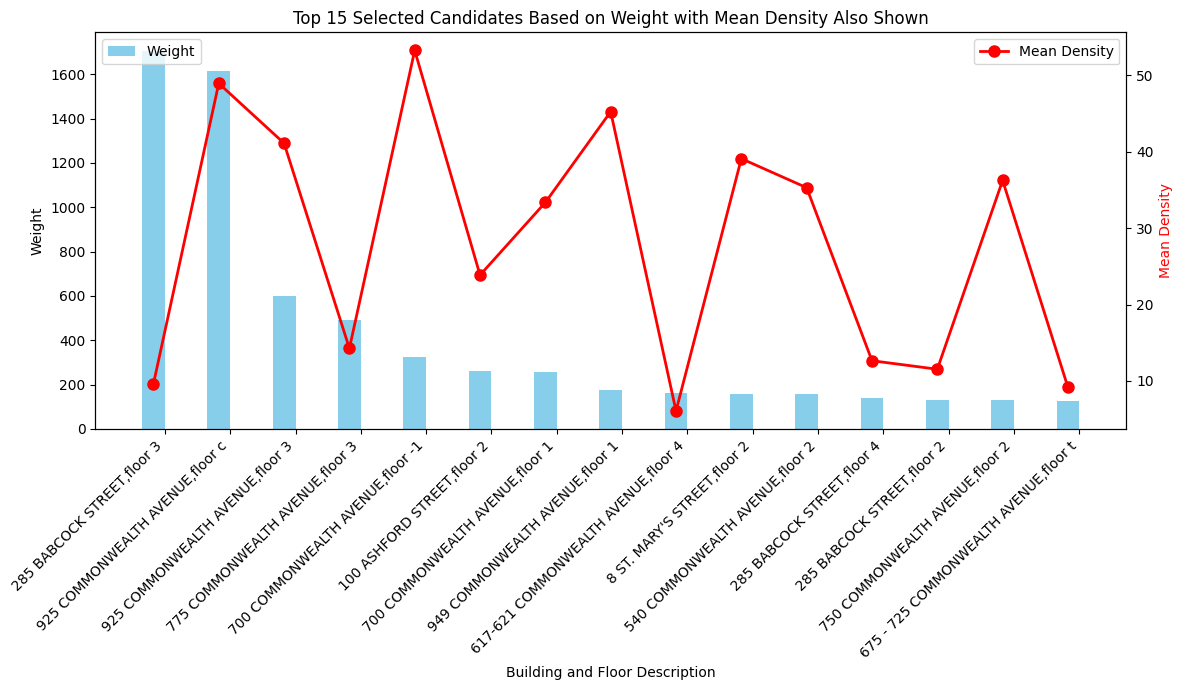

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading the data
plot_data = pd.read_csv('../new_data/selected_candidates.csv')


# Create a new column combining building description and floor
plot_data['description_floor'] = plot_data['building_desc'] + ",floor " + plot_data['building_floor'].astype(str)

# Now you can proceed with the sorting and plotting as you described
top_15_weight = plot_data.sort_values(by='weight', ascending=False).head(15)

# Plotting the top 15 buildings based on average density
plt.figure(figsize=(12, 7))
top_15_weight.set_index('description_floor')['weight'].plot(kind='bar', color='skyblue')

plt.title('Top 15 selected candidates based on Weight')
plt.xlabel('Building and Floor Description')
plt.ylabel('Weight Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../visualization/Top_15_selected_candidates_based_on_Weight.png')
#also show max density now

#also show max density now
fig, ax = plt.subplots(figsize=(12, 7))

# Set the positions of the bars on the x-axis
indices = range(len(top_15_weight))
width = 0.35  # the width of the bars

# Plot weight as bars
weight_bars = ax.bar(indices, top_15_weight['weight'], width, label='Weight', color='skyblue')

# Plot max density as a line
ax2 = ax.twinx()  # Create a second y-axis for the max density
ax2.plot(indices, top_15_weight['max_density_cnt'], label='Max Density', color='red', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Building and Floor Description')
ax.set_ylabel('Weight')
ax2.set_ylabel('Max Density', color='red')
ax.set_title('Top 15 Selected Candidates Based on Weight with Max Density Also Shown')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(top_15_weight['description_floor'], rotation=45, ha='right')

# Adding a legend to distinguish between weight and max densities
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # to make sure layout is handled well
plt.savefig('../visualization/Top_15_Selected_Candidates_Based_on_Weight_with_Max_Density_Also_Shown.png')
plt.show()

#now show weight with mean density
fig, ax = plt.subplots(figsize=(12, 7))

# Set the positions of the bars on the x-axis
indices = range(len(top_15_weight))
width = 0.35  # the width of the bars

# Plot weight as bars
weight_bars = ax.bar(indices, top_15_weight['weight'], width, label='Weight', color='skyblue')

# Plot max density as a line
ax2 = ax.twinx()  # Create a second y-axis for the max density
ax2.plot(indices, top_15_weight['mean_density_cnt'], label='Mean Density', color='red', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Building and Floor Description')
ax.set_ylabel('Weight')
ax2.set_ylabel('Mean Density', color='red')
ax.set_title('Top 15 Selected Candidates Based on Weight with Mean Density Also Shown')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(top_15_weight['description_floor'], rotation=45, ha='right')

# Adding a legend to distinguish between weight and max densities
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # to make sure layout is handled well
plt.savefig('../visualization/Top_15_Selected_Candidates_Based_on_Weight_with_Mean_Density_Also_Shown.png')
plt.show()


In [15]:
import pandas as pd
#pip3 install folium
import folium
from branca.element import Template, MacroElement

# Load data
data = pd.read_csv('../new_data/selected_candidates.csv')

# Ensure latitude, longitude, and weight are not NaN
data = data.dropna(subset=['latitude', 'longitude', 'weight'])

# Select top 15 candidates based on weight and reset index to use as rank
top_15_candidates = data.nlargest(15, 'weight').reset_index(drop=True)

# Function to slightly offset latitude and longitude to prevent overlap
def offset_location(lat, lon, index, offset_size=0.0002):
    return (lat + index * offset_size, lon + index * offset_size)

# Define colors for different ranks
def get_icon_color(rank):
    if rank <= 5:
        return 'green'  # Top 5
    elif rank <= 10:
        return 'orange'  # Rank 6 to 10
    else:
        return 'red'  # Rank 11 to 15
    
# Track seen locations
seen_locations = {}

# Create a map centered around the average coordinates of the candidates
if not top_15_candidates.empty:
    mean_lat = top_15_candidates['latitude'].mean()
    mean_lon = top_15_candidates['longitude'].mean()
    mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=16)

    # Add markers for each candidate
    for idx, candidate in top_15_candidates.iterrows():

        coord = (candidate['latitude'], candidate['longitude'])
        if coord not in seen_locations:
            seen_locations[coord] = 0
        else:
            seen_locations[coord] += 1

        # Offset if necessary
        new_coord = offset_location(candidate['latitude'], candidate['longitude'], seen_locations[coord])

        rank = idx + 1
        folium.Marker(
            location=new_coord,
            popup=f"Rank: {rank}\nBuilding: {candidate['building_desc']}\nFloor: {candidate['building_floor']}\nWeight: {candidate['weight']}\nType: {candidate['building_type']}",
            icon=folium.Icon(color=get_icon_color(rank), icon='info-sign')
        ).add_to(mymap)

    # Add a legend
    template = """
  {% macro html(this, kwargs) %}
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 170px; height: 100px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color: white; padding: 5px;">
                &nbsp; Color Legend <br>
                &nbsp; Top 5 - <i style="color:green">Green</i><br>
                &nbsp; Rank 6-10 - <i style="color:orange">Orange</i><br>
                &nbsp; Rank 11-15 - <i style="color:red">Red</i>
    </div>
    {% endmacro %}
    """

    macro = MacroElement()
    macro._template = Template(template)

    mymap.get_root().add_child(macro)

    # Save the map to an HTML file
    mymap.save('../visualization/top_15_candidates_map_by_weight.html')
else:
    print("No candidates with valid location data to display.")

Distribution_of_Building_Types:
building_type
Academic           15
Residential        13
Athletic            9
Research            8
Student Support     4
Administrative      1
Name: count, dtype: int64
Distribution_of_Mechanical_Ventilation:
Mechanical Ventilation
Yes        27
No         12
Partial     7
Name: count, dtype: int64


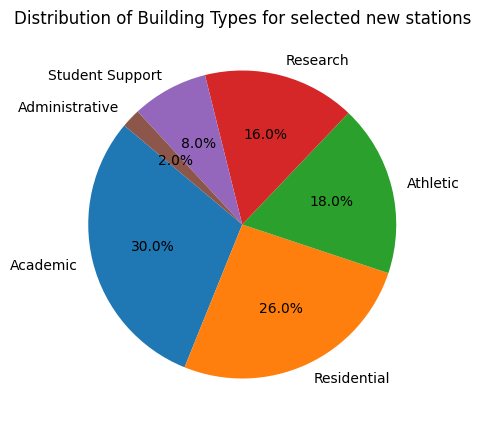

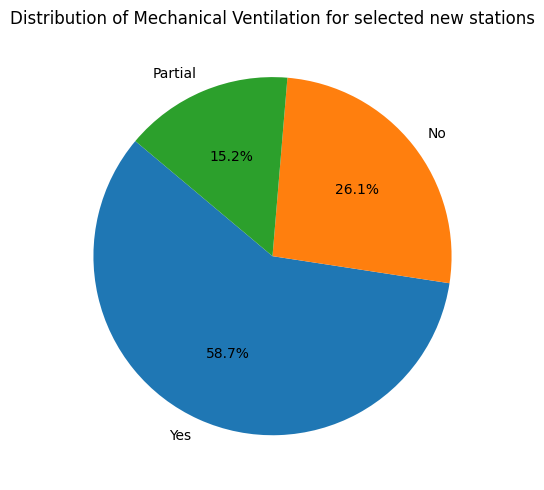

In [16]:
#add new function: add two pie charts show building type and mechanical vertilation of selected_candidates.csv
import pandas as pd
import matplotlib.pyplot as plt

# data loda
data = pd.read_csv('../new_data/selected_candidates.csv')

# building type counts
building_type_counts = data['building_type'].value_counts()
print("Distribution_of_Building_Types:")
print(building_type_counts)

# mechanical ventilation counts
mechanical_ventilation_counts = data['Mechanical Ventilation'].value_counts()
print("Distribution_of_Mechanical_Ventilation:")
print(mechanical_ventilation_counts)

# form pie charts
plt.figure(figsize=(8, 5))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Building Types for selected new stations')
plt.savefig('../visualization/Distribution_of_Building_Types_for_selected_candidates.png')

plt.figure(figsize=(8, 5))
plt.pie(mechanical_ventilation_counts, labels=mechanical_ventilation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mechanical Ventilation for selected new stations')
plt.savefig('../visualization/Distribution_of_Mechanical_Ventilation_for_selected_candidates.png')

plt.tight_layout()
plt.show()
